1. Import Required Packages

In [73]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime
import statistics
import sys

Datasource: https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data

Dataset Information: The data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.


2. Import the CSV Data into Pandas Dataframe

In [9]:
filepath = 'Raw Data'

In [10]:
allfiles = sorted(glob.glob(filepath + "/*.csv"))
allfiles

['Raw Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Changping_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Dingling_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Dongsi_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Guanyuan_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Gucheng_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Huairou_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Shunyi_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Tiantan_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Wanliu_20130301-20170228.csv',
 'Raw Data/PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [11]:
dataFrames = []
for i in allfiles:
    df = pd.read_csv(i, index_col=None, header=0)
    dataFrames.append(df)
alldata = pd.concat(dataFrames)
alldata

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [12]:
alldata.reset_index(inplace = True)
alldata

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


3. Perform various checks on the data
    - Check statistics of data set
    - Check data type
    - Check Missing values


    3.1 Check statistics of data set

In [13]:
alldata.describe()

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17531.500000,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,0.000000,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8765.750000,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17531.500000,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26297.250000,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35063.000000,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


    3.2 Check data type

In [14]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   index    420768 non-null  int64  
 1   No       420768 non-null  int64  
 2   year     420768 non-null  int64  
 3   month    420768 non-null  int64  
 4   day      420768 non-null  int64  
 5   hour     420768 non-null  int64  
 6   PM2.5    412029 non-null  float64
 7   PM10     414319 non-null  float64
 8   SO2      411747 non-null  float64
 9   NO2      408652 non-null  float64
 10  CO       400067 non-null  float64
 11  O3       407491 non-null  float64
 12  TEMP     420370 non-null  float64
 13  PRES     420375 non-null  float64
 14  DEWP     420365 non-null  float64
 15  RAIN     420378 non-null  float64
 16  wd       418946 non-null  object 
 17  WSPM     420450 non-null  float64
 18  station  420768 non-null  object 
dtypes: float64(11), int64(6), object(2)
memory usage: 61.0+ MB


It is observed that only two columns are categorical features, rest all are numeric.

    3.3 Check number of missing values in each column

In [15]:
alldata.isnull().sum()

index          0
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [16]:
(alldata.isnull().sum()/len(alldata.index))*100

index      0.000000
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64

    3.4 Filling in the null values in numerical columns

    In time-independent (non-chronological) data, the most popular approaches to replace missing field values, are the mean or the median value. However, in the case of a time series, many other imputation techniques are adopted. In this project, the linear interpolation method is used. The data set contains less than 5% missing values, these missing values are addressed by linear spline imputation.

In [17]:
# Interpolation of missing values in numerical columns

alldata.interpolate(method='linear', inplace=True)

In [18]:
alldata.isnull().sum()

index         0
No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

    3.5 Filling in the missing values in categorical columns

In [19]:
# fill the null values in categorical column wd

# fill in the missing data in the wd column with mode values according to the station.
unique_station = pd.unique(alldata.station)

# find columns mode value in WinDir column according to Station column specific
# Equalize the mode values of columns to the missing values

temp_data = alldata.copy()  # set temp_data variable to avoid losing real data
columns = ["wd"] # it can be add more column
for c in unique_station:

    # create Station filter
    Station_filtre = temp_data.station == c

    # filter data by Station
    filtered_data = temp_data[Station_filtre]

    # find mode for WinDir specific to Station
    for column in columns:
        mode = statistics.mode(filtered_data[column])
        filtered_data[column] = filtered_data[column].fillna(mode)
        print(f"Missing Value in {column} column fill with {mode} when station:{c}")

    # Synchronize data filled with missing values in WinDir to data temporary
    temp_data[Station_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
alldata = temp_data.copy()

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Missing Value in wd column fill with NE when station:Aotizhongxin
Missing Value in wd column fill with NNW when station:Changping
Missing Value in wd column fill with NNW when station:Dingling
Missing Value in wd column fill with ENE when station:Dongsi
Missing Value in wd column fill with NE when station:Guanyuan
Missing Value in wd column fill with N when station:Gucheng
Missing Value in wd column fill with NW when station:Huairou
Missing Value in wd column fill with ENE when station:Nongzhanguan
Missing Value in wd column fill with NNE when station:Shunyi
Missing Value in wd column fill with ENE when station:Tiantan
Missing Value in wd column fill with NE when station:Wanliu
Missing Value in wd column fill with NE when station:Wanshouxigong


In [20]:
alldata.isnull().sum()

index      0
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [21]:
# create a datetime column using the year,month,day and hour columns.
years = alldata['year'].values
months = alldata['month'].values
days = alldata['day'].values
hours = alldata['hour'].values
full_date = []

for i in range(alldata.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
alldata = pd.concat([dates,alldata],axis=1)

alldata.head()

,date,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


4. Feature Engineering
    - Encoding Categorical variable

    4.1 Encoding Categorical variable

    The wind direction attribute is categorical data, admits 16 values: N, NNE, NE, ENE, E, ESE, SE, SSE, S, SSW, SW, WSW, W, WNW, NW, and NNW. Each cardinal wind direction is converted to a value of degrees. We have divided the compass into 16 sectors of 22.5 degrees each. North was given a value of zero and with clockwise displacement, the value increase by 22.5 degrees. The direction of each segment is 22.5 degrees. as shown in Figure below. 

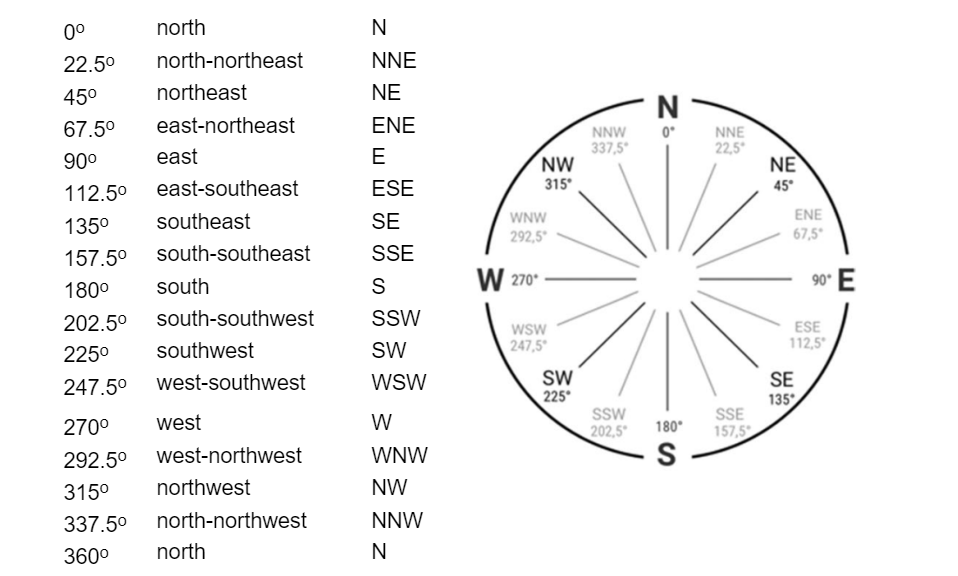

In [22]:
# Encoding categorical variable Wind Direction (wd)

# Mapping categories to angles
angle_mapping = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5,
    'N': 360
}

# Creating a new column 'Theta' based on the mapping
alldata['Theta'] = alldata['wd'].map(angle_mapping)


However, if the numerical values (in degrees) of the corresponding wind direction is used as feature directly, then we get discontinuity at 0o and 360o which both represents wind direction north (N). Hence, to maintain the cyclic nature of the wind direction feature, it is further transformed into two features. For each wind direction category, Sine and Cosine of the corresponding degrees.  

In [23]:
# Adding columns for sin('Theta') and cos('Theta')
alldata['sin_Theta'] = np.sin(np.radians(alldata['Theta']))
alldata['cos_Theta'] = np.cos(np.radians(alldata['Theta']))

In [24]:
alldata.shape

(420768, 23)

In [25]:
alldata.head()

,date,index,No,year,month,day,hour,PM2.5,PM10,SO2,...,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Theta,sin_Theta,cos_Theta
0,2013-03-01 00:00:00,0,1,2013,3,1,0,4.0,4.0,4.0,...,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,337.5,-3.826834e-01,0.923880
1,2013-03-01 01:00:00,1,2,2013,3,1,1,8.0,8.0,4.0,...,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,360.0,-2.449294e-16,1.000000
2,2013-03-01 02:00:00,2,3,2013,3,1,2,7.0,7.0,5.0,...,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,337.5,-3.826834e-01,0.923880
3,2013-03-01 03:00:00,3,4,2013,3,1,3,6.0,6.0,11.0,...,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,315.0,-7.071068e-01,0.707107
4,2013-03-01 04:00:00,4,5,2013,3,1,4,3.0,3.0,12.0,...,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,360.0,-2.449294e-16,1.000000


    4.2 Feature Selection
    
        4.2.1 Finding the correlation between PM2.5 for Target station (Aotizhongxin) and the other columns corresponding to this station (Aotizhongxin)
        
        - PM2.5 (Aotizhongxin) and other air quality features ('PM10','SO2','NO2','CO','O3')
        - PM2.5 (Aotizhongxin) and meteorological features ('TEMP','PRES','DEWP','RAIN','WSPM')

In [26]:
One_site = alldata.iloc[ :35064, : ]

In [27]:
One_site

,date,index,No,year,month,day,hour,PM2.5,PM10,SO2,...,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Theta,sin_Theta,cos_Theta
0,2013-03-01 00:00:00,0,1,2013,3,1,0,4.0,4.0,4.0,...,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,337.5,-3.826834e-01,0.923880
1,2013-03-01 01:00:00,1,2,2013,3,1,1,8.0,8.0,4.0,...,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,360.0,-2.449294e-16,1.000000
2,2013-03-01 02:00:00,2,3,2013,3,1,2,7.0,7.0,5.0,...,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,337.5,-3.826834e-01,0.923880
3,2013-03-01 03:00:00,3,4,2013,3,1,3,6.0,6.0,11.0,...,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,315.0,-7.071068e-01,0.707107
4,2013-03-01 04:00:00,4,5,2013,3,1,4,3.0,3.0,12.0,...,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,360.0,-2.449294e-16,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35059,35060,2017,2,28,19,12.0,29.0,5.0,...,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,315.0,-7.071068e-01,0.707107
35060,2017-02-28 20:00:00,35060,35061,2017,2,28,20,13.0,37.0,7.0,...,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,292.5,-9.238795e-01,0.382683
35061,2017-02-28 21:00:00,35061,35062,2017,2,28,21,16.0,37.0,10.0,...,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,315.0,-7.071068e-01,0.707107
35062,2017-02-28 22:00:00,35062,35063,2017,2,28,22,21.0,44.0,12.0,...,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,337.5,-3.826834e-01,0.923880


In [28]:
One_site.drop(columns=['index'], inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
One_site = One_site.set_index('date')

In [30]:
One_site.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Theta,sin_Theta,cos_Theta
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,337.5,-3.826834e-01,0.923880
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,360.0,-2.449294e-16,1.000000
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,337.5,-3.826834e-01,0.923880
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,315.0,-7.071068e-01,0.707107
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,360.0,-2.449294e-16,1.000000


Correlation of PM2.5 (Aotizhongxin) and other air quality features ('PM10','SO2','NO2','CO','O3') at Aotizhongxin station

In [31]:
air_quality_feature = ['PM2.5','PM10','SO2','NO2','CO','O3']

data_AQF = One_site[air_quality_feature]

Text(0.5, 1.0, 'Correlation of Air Quality Features')

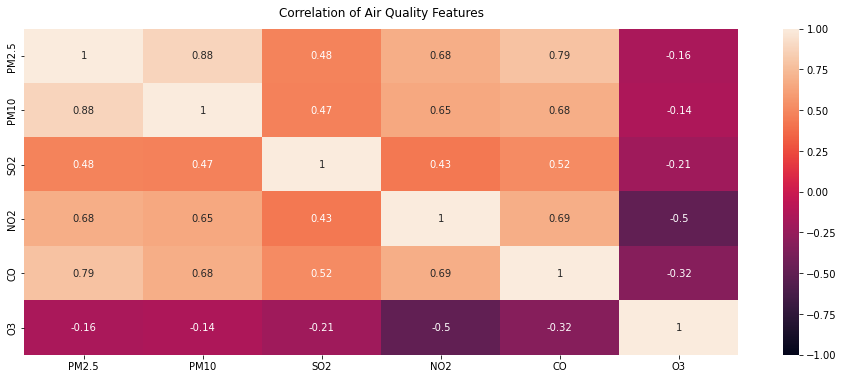

In [32]:
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(data_AQF.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation of Air Quality Features', fontdict={'fontsize':12}, pad=12)

There is a high correlation value between PM2.5 and PM10, NO2, CO. But the correlation value between PM2.5 and O3, S02 is less than 0.5, hence O3 and S02 will not be selected as features.

In [33]:
One_site.drop(columns=['O3', 'SO2'], inplace=True)

Correlation of PM2.5 (Aotizhongxin) and meteorological features ('TEMP','PRES','DEWP','RAIN','WSPM')

In [34]:
Met_Feature = ['PM2.5','TEMP','PRES','DEWP','RAIN','WSPM']

In [35]:
Met_F = One_site[Met_Feature]

In [36]:
Met_F.head()

,PM2.5,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,
2013-03-01 00:00:00,4.0,-0.7,1023.0,-18.8,0.0,4.4
2013-03-01 01:00:00,8.0,-1.1,1023.2,-18.2,0.0,4.7
2013-03-01 02:00:00,7.0,-1.1,1023.5,-18.2,0.0,5.6
2013-03-01 03:00:00,6.0,-1.4,1024.5,-19.4,0.0,3.1
2013-03-01 04:00:00,3.0,-2.0,1025.2,-19.5,0.0,2.0


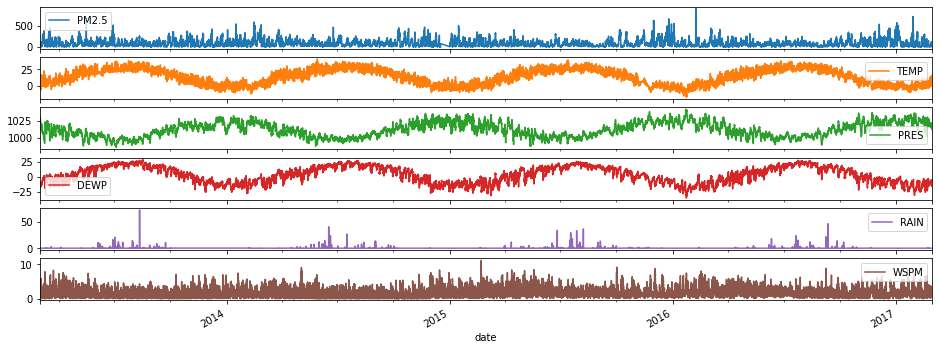

In [37]:
# Plot data

Met_F.plot(subplots=True, figsize=(16, 6))
plt.show()


    4.2.2 Finding the correlation between PM2.5 for Target station (Aotizhongxin) and the corresponding PM2.5 for nearby stations: 
        PM2.5 (Changping)
        PM2.5 (Dingling)
        PM2.5 (Dongsi)
        PM2.5 (Gucheng)
        PM2.5 (Nongzhanguan)
        PM2.5 (Huairou)
        PM2.5 (Wanshouxigong)
        PM2.5 (Guanyuan)
        PM2.5 (Shunyi)
        PM2.5 (Tiantan)
        PM2.5 (Wanliu)
      

In [38]:
unique_stations = alldata['station'].unique()
print(unique_stations)

['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


In [39]:
df_Aot = alldata[alldata['station'] == 'Aotizhongxin']
PM_Aot = pd.DataFrame(df_Aot['PM2.5'])

PM_Aot.reset_index(drop=True)

data1 = PM_Aot.values
df1 = pd.DataFrame(data1, columns=['PM2.5'])

In [40]:
df_Cha = alldata[alldata['station'] == 'Changping']
PM_Cha = pd.DataFrame(df_Cha['PM2.5'])

PM_Cha.reset_index(drop=True)

data2 = PM_Cha.values
df2 = pd.DataFrame(data2, columns=['PM2.5_Chan'])

In [41]:
df_Din = alldata[alldata['station'] == 'Dingling']
PM_Din = pd.DataFrame(df_Din['PM2.5'])

PM_Din.reset_index(drop=True)

data3 = PM_Din.values
df3 = pd.DataFrame(data3, columns=['PM2.5_Ding'])

In [42]:
df_Don = alldata[alldata['station'] == 'Dongsi']
PM_Don = pd.DataFrame(df_Don['PM2.5'])

PM_Don.reset_index(drop=True)

data4 = PM_Don.values
df4 = pd.DataFrame(data4, columns=['PM2.5_Dong'])

In [43]:
df_Hua = alldata[alldata['station'] == 'Huairou']
PM_Hua = pd.DataFrame(df_Hua['PM2.5'])

PM_Hua.reset_index(drop=True)

data5 = PM_Hua.values
df5 = pd.DataFrame(data5, columns=['PM2.5_Huai'])

In [44]:
df_Wan = alldata[alldata['station'] == 'Wanshouxigong']
PM_Wan = pd.DataFrame(df_Wan['PM2.5'])

PM_Wan.reset_index(drop=True)

data6 = PM_Wan.values
df6 = pd.DataFrame(data6, columns=['PM2.5_Wans'])

In [45]:
df_Gua = alldata[alldata['station'] == 'Guanyuan']
PM_Gua = pd.DataFrame(df_Gua['PM2.5'])

PM_Gua.reset_index(drop=True)

data7 = PM_Gua.values
df7 = pd.DataFrame(data7, columns=['PM2.5_Guan'])

In [46]:
df_Guc = alldata[alldata['station'] == 'Gucheng']
PM_Guc = pd.DataFrame(df_Guc['PM2.5'])

PM_Guc.reset_index(drop=True)

data8 = PM_Guc.values
df8 = pd.DataFrame(data8, columns=['PM2.5_Guch'])

In [47]:
df_Non = alldata[alldata['station'] == 'Nongzhanguan']
PM_Non = pd.DataFrame(df_Non['PM2.5'])

PM_Non.reset_index(drop=True)

data9 = PM_Non.values
df9 = pd.DataFrame(data9, columns=['PM2.5_Nong'])

In [48]:
df_Tia = alldata[alldata['station'] == 'Tiantan']
PM_Tia = pd.DataFrame(df_Tia['PM2.5'])

PM_Tia.reset_index(drop=True)

data10 = PM_Tia.values
df10= pd.DataFrame(data10, columns=['PM2.5_Tian'])

In [49]:
df_Shu = alldata[alldata['station'] == 'Shunyi']
PM_Shu = pd.DataFrame(df_Shu['PM2.5'])

PM_Shu.reset_index(drop=True)

data11 = PM_Shu.values
df11 = pd.DataFrame(data11, columns=['PM2.5_Shun'])

In [50]:
df_Wanl = alldata[alldata['station'] == 'Wanliu']
PM_Wanl = pd.DataFrame(df_Wanl['PM2.5'])

PM_Wanl.reset_index(drop=True)

data12 = PM_Wanl.values
df12 = pd.DataFrame(data12, columns=['PM2.5_Wanl'])

In [51]:
# Concatenate the DataFrames along the columns (axis=1)
PM_Corr = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=1)

print(PM_Corr)

       PM2.5  PM2.5_Chan  PM2.5_Ding  PM2.5_Dong  PM2.5_Huai  PM2.5_Wans  \
0        4.0         3.0         4.0         9.0         7.0         9.0   
1        8.0         3.0         7.0         4.0         4.0        11.0   
2        7.0         3.0         5.0         7.0         4.0         8.0   
3        6.0         3.0         6.0         3.0         3.0         8.0   
4        3.0         3.0         5.0         3.0         3.0         8.0   
...      ...         ...         ...         ...         ...         ...   
35059   12.0        28.0        11.0        16.0        16.0        11.0   
35060   13.0        12.0        13.0        18.0        21.0        13.0   
35061   16.0         7.0         9.0        23.0        17.0        14.0   
35062   21.0        11.0        10.0        23.0        11.0        12.0   
35063   19.0        20.0        13.0        30.0        11.0        13.0   

       PM2.5_Guan  PM2.5_Guch  PM2.5_Nong  PM2.5_Tian  PM2.5_Shun  PM2.5_Wanl  
0      

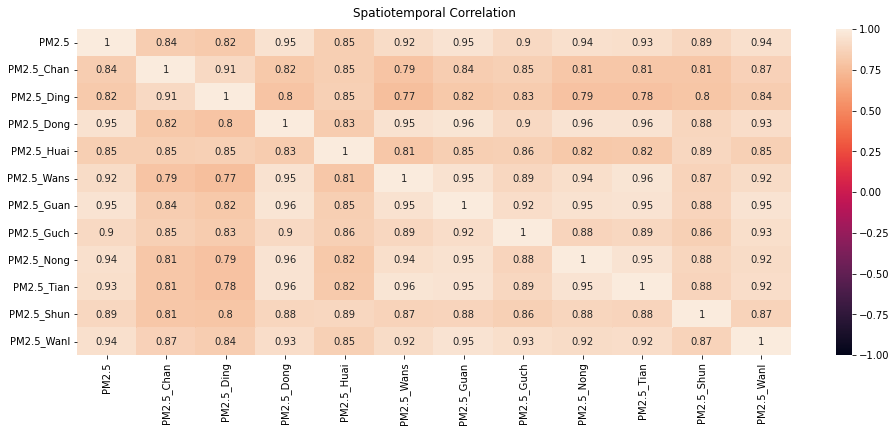

In [52]:
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

heatmap2 = sns.heatmap(PM_Corr.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap2.set_title('Spatiotemporal Correlation', fontdict={'fontsize':12}, pad=12);

In [53]:
PM_Corr.head()

,PM2.5,PM2.5_Chan,PM2.5_Ding,PM2.5_Dong,PM2.5_Huai,PM2.5_Wans,PM2.5_Guan,PM2.5_Guch,PM2.5_Nong,PM2.5_Tian,PM2.5_Shun,PM2.5_Wanl
0,4.0,3.0,4.0,9.0,7.0,9.0,4.0,6.0,5.0,6.0,3.0,8.0
1,8.0,3.0,7.0,4.0,4.0,11.0,4.0,6.0,8.0,6.0,12.0,9.0
2,7.0,3.0,5.0,7.0,4.0,8.0,3.0,5.0,3.0,6.0,14.0,3.0
3,6.0,3.0,6.0,3.0,3.0,8.0,3.0,6.0,5.0,6.0,12.0,11.0
4,3.0,3.0,5.0,3.0,3.0,8.0,3.0,5.0,5.0,5.0,12.0,3.0


In [54]:
PM_Corr.drop(columns=['PM2.5'], inplace=True)

In [55]:
value = alldata.loc[ :35063,'PM2.5': ]

In [56]:
df = pd.DataFrame(value)

In [57]:
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Theta,sin_Theta,cos_Theta
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,337.5,-3.826834e-01,0.923880
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,360.0,-2.449294e-16,1.000000
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,337.5,-3.826834e-01,0.923880
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,315.0,-7.071068e-01,0.707107
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,360.0,-2.449294e-16,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,315.0,-7.071068e-01,0.707107
35060,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,292.5,-9.238795e-01,0.382683
35061,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,315.0,-7.071068e-01,0.707107
35062,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,337.5,-3.826834e-01,0.923880


In [58]:
df.drop(columns=['O3', 'SO2', 'Theta','wd','station'], inplace=True)

In [59]:
final_df = pd.concat([df,PM_Corr], axis=1)

In [60]:
final_df.head()

,PM2.5,PM10,NO2,CO,TEMP,PRES,DEWP,RAIN,WSPM,sin_Theta,...,PM2.5_Ding,PM2.5_Dong,PM2.5_Huai,PM2.5_Wans,PM2.5_Guan,PM2.5_Guch,PM2.5_Nong,PM2.5_Tian,PM2.5_Shun,PM2.5_Wanl
0,4.0,4.0,7.0,300.0,-0.7,1023.0,-18.8,0.0,4.4,-3.826834e-01,...,4.0,9.0,7.0,9.0,4.0,6.0,5.0,6.0,3.0,8.0
1,8.0,8.0,7.0,300.0,-1.1,1023.2,-18.2,0.0,4.7,-2.449294e-16,...,7.0,4.0,4.0,11.0,4.0,6.0,8.0,6.0,12.0,9.0
2,7.0,7.0,10.0,300.0,-1.1,1023.5,-18.2,0.0,5.6,-3.826834e-01,...,5.0,7.0,4.0,8.0,3.0,5.0,3.0,6.0,14.0,3.0
3,6.0,6.0,11.0,300.0,-1.4,1024.5,-19.4,0.0,3.1,-7.071068e-01,...,6.0,3.0,3.0,8.0,3.0,6.0,5.0,6.0,12.0,11.0
4,3.0,3.0,12.0,300.0,-2.0,1025.2,-19.5,0.0,2.0,-2.449294e-16,...,5.0,3.0,3.0,8.0,3.0,5.0,5.0,5.0,12.0,3.0


In [61]:
final_df.columns

Index(['PM2.5', 'PM10', 'NO2', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM',
       'sin_Theta', 'cos_Theta', 'PM2.5_Chan', 'PM2.5_Ding', 'PM2.5_Dong',
       'PM2.5_Huai', 'PM2.5_Wans', 'PM2.5_Guan', 'PM2.5_Guch', 'PM2.5_Nong',
       'PM2.5_Tian', 'PM2.5_Shun', 'PM2.5_Wanl'],
      dtype='object')

In [62]:
final_df

,PM2.5,PM10,NO2,CO,TEMP,PRES,DEWP,RAIN,WSPM,sin_Theta,...,PM2.5_Ding,PM2.5_Dong,PM2.5_Huai,PM2.5_Wans,PM2.5_Guan,PM2.5_Guch,PM2.5_Nong,PM2.5_Tian,PM2.5_Shun,PM2.5_Wanl
0,4.0,4.0,7.0,300.0,-0.7,1023.0,-18.8,0.0,4.4,-3.826834e-01,...,4.0,9.0,7.0,9.0,4.0,6.0,5.0,6.0,3.0,8.0
1,8.0,8.0,7.0,300.0,-1.1,1023.2,-18.2,0.0,4.7,-2.449294e-16,...,7.0,4.0,4.0,11.0,4.0,6.0,8.0,6.0,12.0,9.0
2,7.0,7.0,10.0,300.0,-1.1,1023.5,-18.2,0.0,5.6,-3.826834e-01,...,5.0,7.0,4.0,8.0,3.0,5.0,3.0,6.0,14.0,3.0
3,6.0,6.0,11.0,300.0,-1.4,1024.5,-19.4,0.0,3.1,-7.071068e-01,...,6.0,3.0,3.0,8.0,3.0,6.0,5.0,6.0,12.0,11.0
4,3.0,3.0,12.0,300.0,-2.0,1025.2,-19.5,0.0,2.0,-2.449294e-16,...,5.0,3.0,3.0,8.0,3.0,5.0,5.0,5.0,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,12.0,29.0,35.0,400.0,12.5,1013.5,-16.2,0.0,2.4,-7.071068e-01,...,11.0,16.0,16.0,11.0,13.0,14.0,14.0,20.0,27.0,11.0
35060,13.0,37.0,45.0,500.0,11.6,1013.6,-15.1,0.0,0.9,-9.238795e-01,...,13.0,18.0,21.0,13.0,20.0,27.0,18.0,11.0,47.0,15.0
35061,16.0,37.0,66.0,700.0,10.8,1014.2,-13.3,0.0,1.1,-7.071068e-01,...,9.0,23.0,17.0,14.0,16.0,22.0,15.0,18.0,18.0,13.0
35062,21.0,44.0,87.0,700.0,10.5,1014.4,-12.9,0.0,1.2,-3.826834e-01,...,10.0,23.0,11.0,12.0,11.0,9.0,11.0,15.0,18.0,12.0


In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       35064 non-null  float64
 1   PM10        35064 non-null  float64
 2   NO2         35064 non-null  float64
 3   CO          35064 non-null  float64
 4   TEMP        35064 non-null  float64
 5   PRES        35064 non-null  float64
 6   DEWP        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   WSPM        35064 non-null  float64
 9   sin_Theta   35064 non-null  float64
 10  cos_Theta   35064 non-null  float64
 11  PM2.5_Chan  35064 non-null  float64
 12  PM2.5_Ding  35064 non-null  float64
 13  PM2.5_Dong  35064 non-null  float64
 14  PM2.5_Huai  35064 non-null  float64
 15  PM2.5_Wans  35064 non-null  float64
 16  PM2.5_Guan  35064 non-null  float64
 17  PM2.5_Guch  35064 non-null  float64
 18  PM2.5_Nong  35064 non-null  float64
 19  PM2.5_Tian  35064 non-nul

In [64]:
# Get data types of each column
column_data_types = final_df.dtypes

# Display the result
print(column_data_types)

PM2.5         float64
PM10          float64
NO2           float64
CO            float64
TEMP          float64
PRES          float64
DEWP          float64
RAIN          float64
WSPM          float64
sin_Theta     float64
cos_Theta     float64
PM2.5_Chan    float64
PM2.5_Ding    float64
PM2.5_Dong    float64
PM2.5_Huai    float64
PM2.5_Wans    float64
PM2.5_Guan    float64
PM2.5_Guch    float64
PM2.5_Nong    float64
PM2.5_Tian    float64
PM2.5_Shun    float64
PM2.5_Wanl    float64
dtype: object


In [65]:
final_df.describe()

,PM2.5,PM10,NO2,CO,TEMP,PRES,DEWP,RAIN,WSPM,sin_Theta,...,PM2.5_Ding,PM2.5_Dong,PM2.5_Huai,PM2.5_Wans,PM2.5_Guan,PM2.5_Guch,PM2.5_Nong,PM2.5_Tian,PM2.5_Shun,PM2.5_Wanl
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,...,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,82.540623,110.210033,59.074106,1264.692405,13.581414,1011.851650,3.120296,0.067383,1.708577,0.127688,...,66.845557,86.144243,69.501747,85.067548,82.897522,84.074802,85.079472,82.033097,79.437962,83.467612
std,81.956401,95.262531,37.000918,1239.411826,11.400426,10.404517,13.690314,0.909798,1.204180,0.712709,...,73.445093,86.260246,70.990900,85.999698,81.070279,82.994634,86.692516,80.895489,81.500282,82.125058
min,3.000000,2.000000,2.000000,100.000000,-16.800000,985.900000,-35.300000,0.000000,0.000000,-1.000000,...,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,22.000000,38.000000,30.000000,500.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,-0.707107,...,14.000000,23.000000,17.000000,23.000000,23.000000,24.000000,22.000000,22.000000,19.000000,23.000000
50%,58.000000,87.000000,53.000000,900.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,0.382683,...,41.000000,61.000000,47.000000,60.000000,59.000000,60.000000,59.000000,58.000000,55.000000,59.000000
75%,114.000000,154.000000,81.000000,1500.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,0.707107,...,94.000000,119.000000,98.000000,116.000000,114.000000,116.000000,116.000000,113.000000,111.000000,116.000000
max,898.000000,984.000000,290.000000,10000.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,1.000000,...,881.000000,737.000000,762.000000,999.000000,680.000000,770.000000,844.000000,821.000000,941.000000,957.000000


In [66]:
final_df

,PM2.5,PM10,NO2,CO,TEMP,PRES,DEWP,RAIN,WSPM,sin_Theta,...,PM2.5_Ding,PM2.5_Dong,PM2.5_Huai,PM2.5_Wans,PM2.5_Guan,PM2.5_Guch,PM2.5_Nong,PM2.5_Tian,PM2.5_Shun,PM2.5_Wanl
0,4.0,4.0,7.0,300.0,-0.7,1023.0,-18.8,0.0,4.4,-3.826834e-01,...,4.0,9.0,7.0,9.0,4.0,6.0,5.0,6.0,3.0,8.0
1,8.0,8.0,7.0,300.0,-1.1,1023.2,-18.2,0.0,4.7,-2.449294e-16,...,7.0,4.0,4.0,11.0,4.0,6.0,8.0,6.0,12.0,9.0
2,7.0,7.0,10.0,300.0,-1.1,1023.5,-18.2,0.0,5.6,-3.826834e-01,...,5.0,7.0,4.0,8.0,3.0,5.0,3.0,6.0,14.0,3.0
3,6.0,6.0,11.0,300.0,-1.4,1024.5,-19.4,0.0,3.1,-7.071068e-01,...,6.0,3.0,3.0,8.0,3.0,6.0,5.0,6.0,12.0,11.0
4,3.0,3.0,12.0,300.0,-2.0,1025.2,-19.5,0.0,2.0,-2.449294e-16,...,5.0,3.0,3.0,8.0,3.0,5.0,5.0,5.0,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,12.0,29.0,35.0,400.0,12.5,1013.5,-16.2,0.0,2.4,-7.071068e-01,...,11.0,16.0,16.0,11.0,13.0,14.0,14.0,20.0,27.0,11.0
35060,13.0,37.0,45.0,500.0,11.6,1013.6,-15.1,0.0,0.9,-9.238795e-01,...,13.0,18.0,21.0,13.0,20.0,27.0,18.0,11.0,47.0,15.0
35061,16.0,37.0,66.0,700.0,10.8,1014.2,-13.3,0.0,1.1,-7.071068e-01,...,9.0,23.0,17.0,14.0,16.0,22.0,15.0,18.0,18.0,13.0
35062,21.0,44.0,87.0,700.0,10.5,1014.4,-12.9,0.0,1.2,-3.826834e-01,...,10.0,23.0,11.0,12.0,11.0,9.0,11.0,15.0,18.0,12.0


In [ ]:
final_df.to_csv('Final_data.csv',index = False)

In [ ]:
# dataset = pd.read_csv('/content/drive/MyDrive/Final Air Pollution/Final_Air_Pollution.csv')

In [ ]:
# dataset.tail(24)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,PM2.5_Ding,PM2.5_Dong,PM2.5_Huai,PM2.5_Wans,PM2.5_Guan,PM2.5_Guch,PM2.5_Nong,PM2.5_Tian,PM2.5_Shun,PM2.5_Wanl
35040,56.0,56.0,22.0,119.0,1400.0,18.0,9.9,1015.6,-8.3,0.0,...,3.0,73.0,71.0,40.0,37.000,34.0,74.000000,62.0,69.0,20.0
35041,15.0,15.0,7.0,45.0,500.0,71.0,8.4,1015.9,-7.8,0.0,...,9.0,31.0,62.0,20.0,33.125,23.0,58.000000,35.0,45.0,21.0
35042,9.0,16.0,7.0,33.0,400.0,82.0,8.6,1016.0,-10.9,0.0,...,8.0,11.0,39.0,10.0,29.250,22.0,45.500000,5.0,29.0,16.0
35043,7.0,15.0,8.0,42.0,300.0,70.0,7.3,1015.8,-9.6,0.0,...,19.0,11.0,32.0,11.0,25.375,24.0,33.000000,9.0,29.0,16.0
35044,13.0,21.0,14.0,45.0,500.0,66.0,7.0,1016.0,-9.4,0.0,...,19.0,14.0,25.0,10.0,21.500,16.0,24.000000,19.0,21.0,12.0
35045,12.0,22.0,16.0,29.0,400.0,77.0,5.3,1015.9,-9.0,0.0,...,14.0,10.0,24.0,11.0,17.625,18.0,14.000000,8.0,13.0,9.0
35046,9.0,16.0,17.0,34.0,500.0,73.0,9.5,1015.9,-11.2,0.0,...,13.0,12.0,42.0,11.0,13.750,15.0,12.000000,14.0,13.0,12.0
35047,11.0,24.0,15.0,47.0,500.0,61.0,8.4,1016.2,-12.1,0.0,...,18.0,10.0,23.0,10.0,9.875,9.0,15.000000,11.0,17.0,10.0
35048,13.0,33.0,16.0,52.0,500.0,58.0,9.2,1016.6,-11.5,0.0,...,25.0,13.0,29.0,3.0,6.000,6.0,8.000000,12.0,18.0,10.0
35049,12.0,24.0,13.0,46.0,500.0,69.0,10.7,1016.7,-11.4,0.0,...,37.0,8.0,28.0,9.0,11.000,8.0,11.000000,12.0,14.0,6.0


In [ ]:
# final_data = pd.read_csv('/content/drive/MyDrive/Final Air Pollution/Final_Air_Pollution.csv')

In [ ]:
# final_data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,PM2.5_Ding,PM2.5_Dong,PM2.5_Huai,PM2.5_Wans,PM2.5_Guan,PM2.5_Guch,PM2.5_Nong,PM2.5_Tian,PM2.5_Shun,PM2.5_Wanl
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,...,4.0,9.0,7.0,9.0,4.0,6.0,5.0,6.0,3.0,8.0
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,...,7.0,4.0,4.0,11.0,4.0,6.0,8.0,6.0,12.0,9.0
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,...,5.0,7.0,4.0,8.0,3.0,5.0,3.0,6.0,14.0,3.0
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,...,6.0,3.0,3.0,8.0,3.0,6.0,5.0,6.0,12.0,11.0
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,...,5.0,3.0,3.0,8.0,3.0,5.0,5.0,5.0,12.0,3.0
